In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
#adtaset is achieved by combinng four datasets 27_7_21.zip ,14_09_21.zip,04_11_21.zip,25_05_22.zip
# Define paths to your dataset folders
data_dir = 'peach_tree_disease'
train_dir = "peach_tree_disease_dataset/train"
test_dir = "peach_tree_disease_dataset/test"
val_dir = "peach_tree_disease_dataset/val"

# Define classes (Healthy, Anarsia lineatella, Grapholita molesta, Dead Trees)
classes = ["Healthy", "Anarsia lineatella", "Grapholita molesta", "Dead Trees"]

# Create train, test, and val directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop through each class to split the data
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    images = os.listdir(cls_path)
    
    # Split data for this class
    train_images, test_val_images = train_test_split(images, test_size=0.3, random_state=42)
    val_images , test_images= train_test_split(test_val_images, test_size=0.33, random_state=42)
    
    # Move images to appropriate directories
    for img in train_images:
        src = os.path.join(cls_path, img)
        dest = os.path.join(train_dir, cls)
        os.makedirs(dest, exist_ok=True)
        shutil.copy(src, dest)
    
    for img in test_images:
        src = os.path.join(cls_path, img)
        dest = os.path.join(test_dir, cls)
        os.makedirs(dest, exist_ok=True)
        shutil.copy(src, dest)
    
    for img in val_images:
        src = os.path.join(cls_path, img)
        dest = os.path.join(val_dir, cls)
        os.makedirs(dest, exist_ok=True)
        shutil.copy(src, dest)


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths for train, test, and validation data
train_directory = "peach_tree_disease_dataset/train"
test_directory = "peach_tree_disease_dataset/test"
val_directory = "peach_tree_disease_dataset/val"
# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Rescale pixel values to range [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training dataset
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess validation dataset
val_generator = test_datagen.flow_from_directory(
    val_directory,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)



Found 157 images belonging to 4 classes.
Found 64 images belonging to 4 classes.
Found 119 images belonging to 4 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')  # 4 output classes(Healthy, Anarsia lineatella, Grapholita molesta, Dead Trees)
])


In [4]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       

In [5]:
history = model.fit(
    train_generator,
    
    epochs=10,
    validation_data=val_generator,
    
)


Epoch 1/10


5/5 [==============================] - 61s 13s/step - loss: 1.2746 - accuracy: 0.3694 - val_loss: 1.0408 - val_accuracy: 0.6387
Epoch 2/10
5/5 [==============================] - 56s 12s/step - loss: 1.1286 - accuracy: 0.4968 - val_loss: 1.1101 - val_accuracy: 0.6387
Epoch 3/10
5/5 [==============================] - 51s 11s/step - loss: 1.1490 - accuracy: 0.4968 - val_loss: 0.9718 - val_accuracy: 0.6387
Epoch 4/10
5/5 [==============================] - 51s 11s/step - loss: 1.1053 - accuracy: 0.4968 - val_loss: 1.0123 - val_accuracy: 0.6387
Epoch 5/10
5/5 [==============================] - 51s 11s/step - loss: 1.0888 - accuracy: 0.4968 - val_loss: 0.9571 - val_accuracy: 0.6387
Epoch 6/10
5/5 [==============================] - 50s 11s/step - loss: 1.0410 - accuracy: 0.5223 - val_loss: 0.9356 - val_accuracy: 0.6218
Epoch 7/10
5/5 [==============================] - 51s 11s/step - loss: 1.0692 - accuracy: 0.5414 - val_loss: 1.1684 - val_accuracy: 0.3613
Epoch 8/10
5/5 [=========

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the evaluation scores
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 13s 7s/step - loss: 0.9801 - accuracy: 0.5312
Test Loss: 0.9801397323608398
Test Accuracy: 0.53125


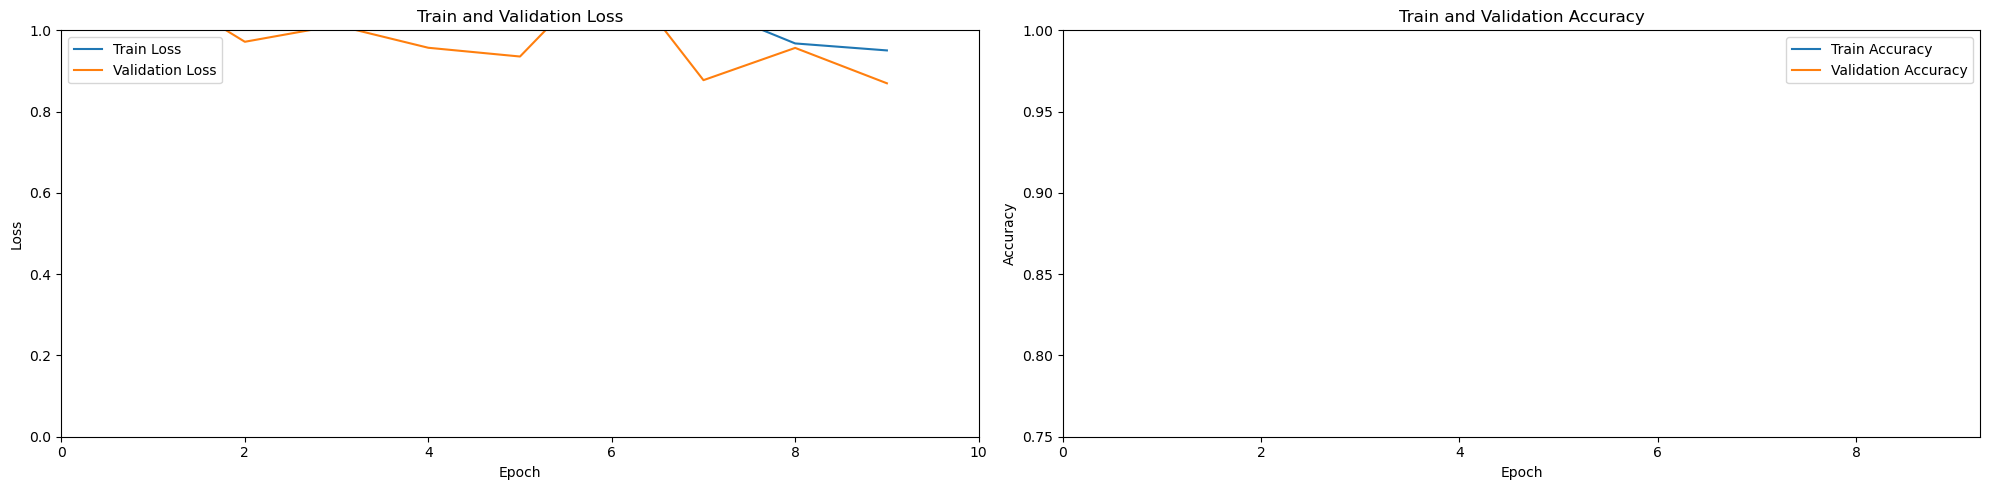

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()


In [8]:

# Make predictions
predictions = model.predict(test_generator)

2/2 [==============================] - 13s 6s/step


FUNCTION FOR PREDICTION OF IMAGES FROM TEST DIRECTORY (TAKES 12 IMAGES/EXECUTION)

In [9]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def predict_images(image_paths, model, test_generator):
    predictions = []
    
    for image_path in image_paths:
        # Load and preprocess the image
        image = Image.open(image_path)
        image = image.convert("RGB")  # Convert to RGB if necessary
        image = image.resize((img_width, img_height))  # Resize to model input size
        image_array = np.expand_dims(np.array(image), axis=0) / 255.0  # Add batch dimension and normalize
        # Make prediction using the trained model
        prediction = model.predict(image_array)
        # Get the predicted class index
        reverse_class_indices = {v: k for k, v in test_generator.class_indices.items()}
        predicted_class_index = np.argmax(prediction)
        # Get the predicted class label using the reverse mapping
        class_label = reverse_class_indices[predicted_class_index]
        # Append the predicted class label to the list of predictions
        predictions.append(class_label)

    return predictions

# Example usage
test_dir = "peach_tree_disease_dataset/test"
subfolders = [subfolder for subfolder in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, subfolder))]
image_paths = []

# Loop 12 times to collect 12 images
for _ in range(12):
    # Randomly select a subfolder
    random_subfolder = random.choice(subfolders)
    subfolder_path = os.path.join(test_dir, random_subfolder)
    
    # Get the list of image files in the selected subfolder
    image_files = [file for file in os.listdir(subfolder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]
    random.shuffle(image_files)  # Shuffle the list of image files
    
    # Check if there are valid image files in the subfolder
    if image_files:
        # Select one image randomly from the subfolder
        image_path = os.path.join(subfolder_path, image_files[0])
        image_paths.append(image_path)

# Shuffle the list of selected image paths
random.shuffle(image_paths)
# Make predictions for the randomly selected images
predicted_classes = predict_images(image_paths, model, test_generator)




1/1 [==============================] - 0s 33ms/step


In [15]:
!pip install h5py

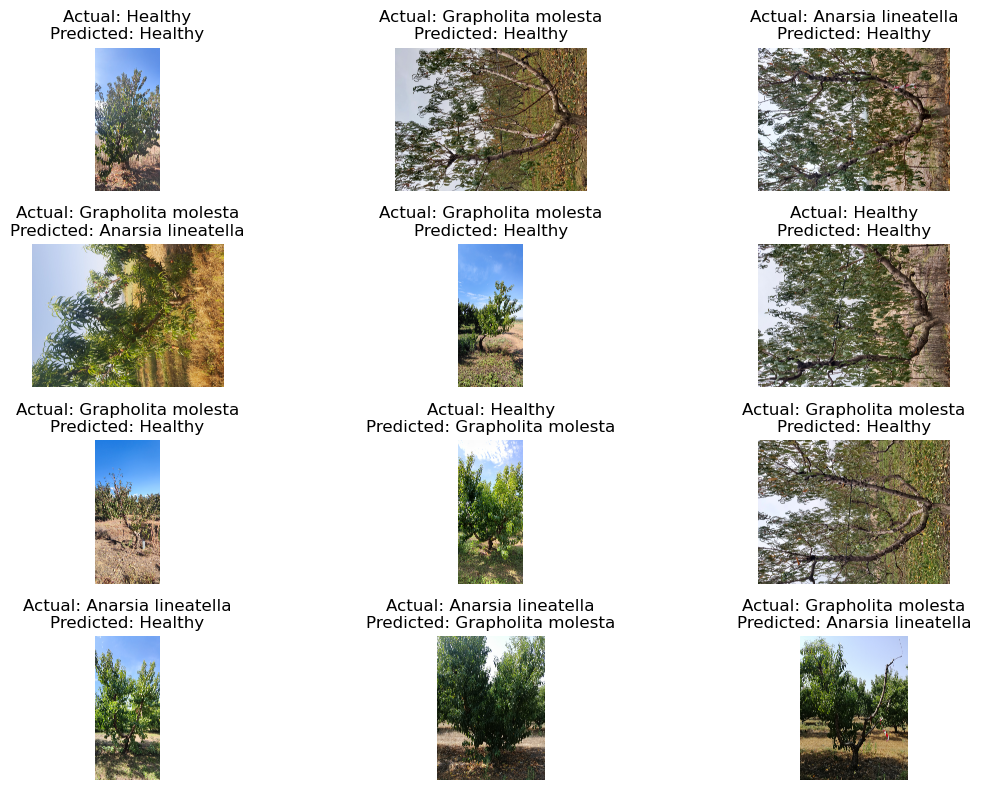

In [10]:
# Display images with actual and predicted class names
plt.figure(figsize=(12, 8))
for i, image_path in enumerate(image_paths):
    image = Image.open(image_path)
    plt.subplot(4, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Actual: {os.path.basename(os.path.dirname(image_path))}\nPredicted: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
model.save('CSVD/PeechTree_model.keras')

In [11]:
#pip install tensorflow

In [12]:
#pip install -U scikit-learn